# K vecinos más cercanos (KNN)

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("../data/raw/winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
# obtener las dimenciones
df.shape

(1599, 12)

In [7]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## Paso : Limpieza de Datos

Eliminar  duplicados 


In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [11]:
df.duplicated().sum()

np.int64(240)

In [13]:
df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

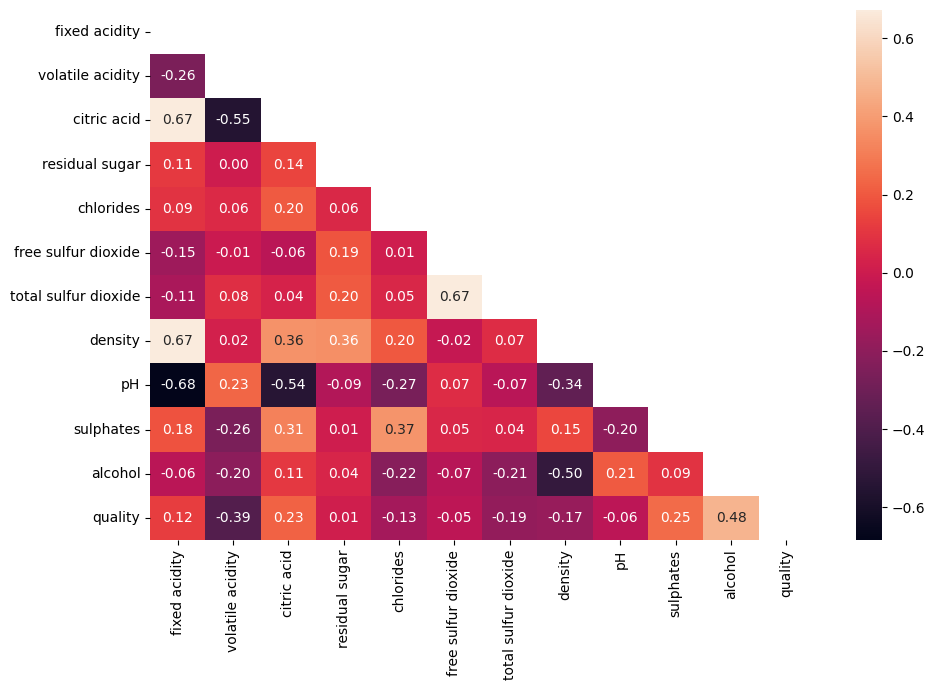

In [15]:
corr = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

In [32]:
df_optimized = df.drop(columns=['residual sugar', 'free sulfur dioxide', 'pH', 'fixed acidity'], axis=1)

In [34]:
df_optimized.columns.tolist()

['volatile acidity',
 'citric acid',
 'chlorides',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol',
 'quality']

In [22]:
df.value_counts('quality')

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### Split

In [23]:
X = df.drop("quality", axis=1)
y = df["quality"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

### Scaling --> Normalizacion

In [39]:
norm_scaler = StandardScaler()  # Instancia de: from sklearn.preprocessing import StandardScaler

num_variables = ['volatile acidity','citric acid','chlorides','total sulfur dioxide','density','sulphates','alcohol']
norm_features = norm_scaler.fit_transform(df[num_variables])

df_norm = pd.DataFrame(norm_features,
                       index=df.index,
                       columns=num_variables)
df_norm.head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,0.961877,-1.391472,-0.243707,-0.379133,0.558274,-0.579207,-0.960246
1,1.967442,-1.391472,0.223875,0.624363,0.028261,0.128950,-0.584777
2,1.297065,-1.186070,0.096353,0.229047,0.134264,-0.048089,-0.584777
3,-1.384443,1.484154,-0.264960,0.411500,0.664277,-0.461180,-0.584777
4,0.961877,-1.391472,-0.243707,-0.379133,0.558274,-0.579207,-0.960246


In [37]:
df_norm

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.961877,-1.391472,-0.243707,-0.379133,0.558274,-0.579207,-0.960246,-0.787823
1,1.967442,-1.391472,0.223875,0.624363,0.028261,0.128950,-0.584777,-0.787823
2,1.297065,-1.186070,0.096353,0.229047,0.134264,-0.048089,-0.584777,-0.787823
3,-1.384443,1.484154,-0.264960,0.411500,0.664277,-0.461180,-0.584777,0.450848
4,0.961877,-1.391472,-0.243707,-0.379133,0.558274,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...
1594,0.403229,-0.980669,0.053845,-0.075043,-0.978765,-0.461180,0.072294,-0.787823
1595,0.123905,-0.877968,-0.541259,0.137820,-0.862162,0.601055,0.729364,0.450848
1596,-0.099554,-0.723916,-0.243707,-0.196679,-0.533554,0.542042,0.541630,0.450848
1597,0.654620,-0.775267,-0.264960,-0.075043,-0.676657,0.305990,-0.209308,-0.787823


In [42]:
# Modelo
model = KNeighborsClassifier()

# Entrenamiento
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [43]:
# Predicción
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

y_pred_test

array([5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6,
       5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 7, 6, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 7, 5, 7, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6,
       5, 6, 6, 7, 5, 7, 5, 5, 5, 5, 5, 7, 6, 5, 8, 5, 5, 6, 6, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 5, 5, 7, 7, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5,
       7, 5, 5, 4, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5,
       6, 5, 7, 5, 7, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 7, 5, 5, 5, 6, 5,
       5, 6, 7, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 7, 7, 6, 5, 5, 6, 5, 6, 6, 5, 7,
       6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 4, 6, 7, 7, 6, 5,
       5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6,

In [44]:
accuracy = {'Accuracy Test': accuracy_score(y_test, y_pred_test),
            'Accuracy Train': accuracy_score(y_train, y_pred_train)}
accuracy

{'Accuracy Test': 0.50625, 'Accuracy Train': 0.6473807662236122}

In [45]:
hiper_params = {'n_neighbors': [11, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35],
                'weights': ['uniform', 'distance'],
                'p': [1, 2]}

In [46]:
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=hiper_params,
                                   n_iter=50,
                                   cv=5,
                                   scoring='accuracy',
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)
random_search.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 29}

In [47]:
random_search.best_score_

np.float64(0.6122150735294117)

In [48]:
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

0.659375